# The Sparks Foundation
**GRIP-Data Science and Business Analytics -November 2022 [#GRIPNOV22]**

**Task-4 : Exploratory Data Analysis-Terrorism. (Level -Intermediate)**

### Name : SREEDEVI KATTOOR¶
Problem Statement :

1.Find out the hot zone of terrorism

2.What all security issues and insights you can derive by EDA?

In [72]:
#IMPORTING LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")# ignore/disable warnings
import plotly.offline as py
import plotly.graph_objs as go

from sklearn.model_selection import train_test_split

In [73]:
#IMPORTING THE DATA SET
df=pd.read_csv(r'C:\Users\HP\OneDrive\Desktop\GRIP\global_terrorism.csv',encoding='ISO-8859-1')

In [74]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [75]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [76]:
#REPLACING THE COLUMN NAMES
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [77]:
#TAKING NECESSARY DATAS
df=df[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type']]

In [78]:
df.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary


In [79]:
df.shape

(181691, 17)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   state        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   city         181257 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   AttackType   181691 non-null  object 
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  Target       181055 non-null  object 
 13  Summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Target_type  181691 non-null  object 
 16  Weapon_type  181691 non-null  object 
dtypes: float64(4), int64(3), object(10)
memory usage: 23.6+ MB


In [81]:
df.describe()

,Year,Month,Day,latitude,longitude,Killed,Wounded
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,3.167668
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,35.949392
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


In [82]:
#CHECK MISSING VALUES
df.isnull().sum()

Year               0
Month              0
Day                0
Country            0
state            421
Region             0
city             434
latitude        4556
longitude       4557
AttackType         0
Killed         10313
Wounded        16311
Target           636
Summary        66129
Group              0
Target_type        0
Weapon_type        0
dtype: int64

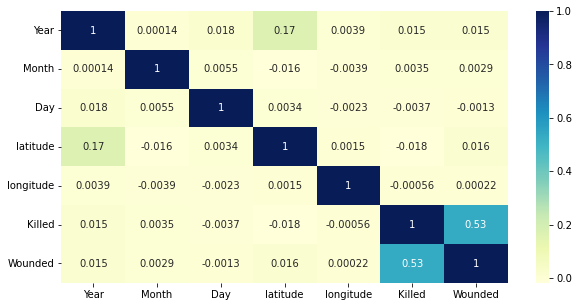

In [83]:
#FINDING THE PAIRWISE CORRELATION BETWEEN COLUMNS AND VISUALIZATION USING HEATMAP
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),cmap='YlGnBu',annot=True)
plt.show()

# DATA VISUALIZATION

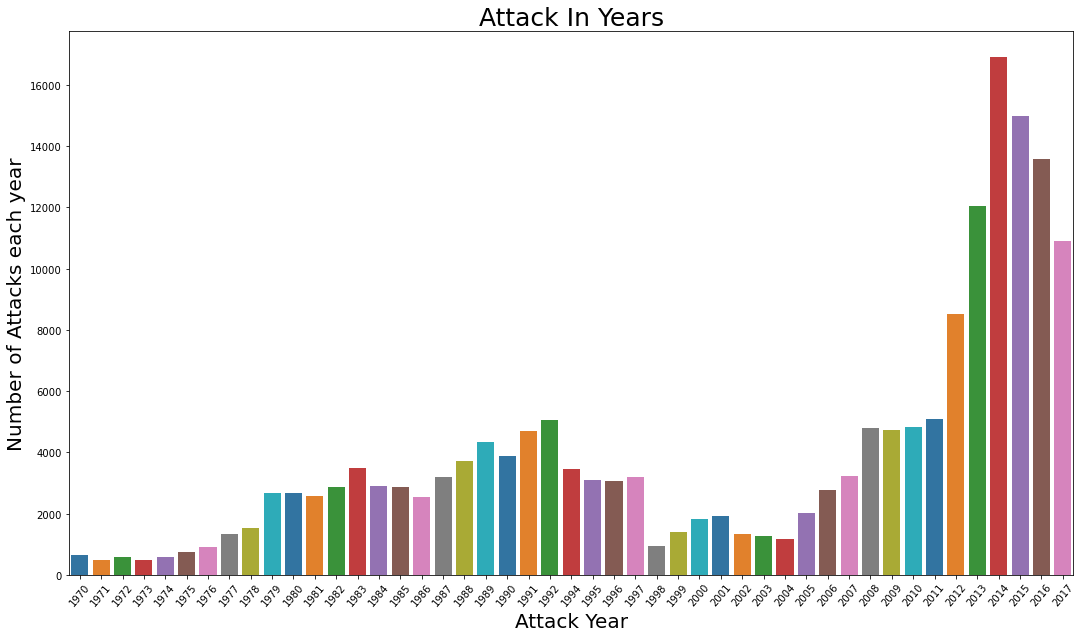

In [84]:
#Plotting attack in years
x_year = df['Year'].unique()
years_count= df['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = x_year,
           y =years_count,
           palette = "tab10")
plt.xticks(rotation =50)
plt.xlabel('Attack Year',fontsize=20)
plt.ylabel('Number of Attacks each year',fontsize=20)
plt.title('Attack In Years',fontsize=25)
plt.show()

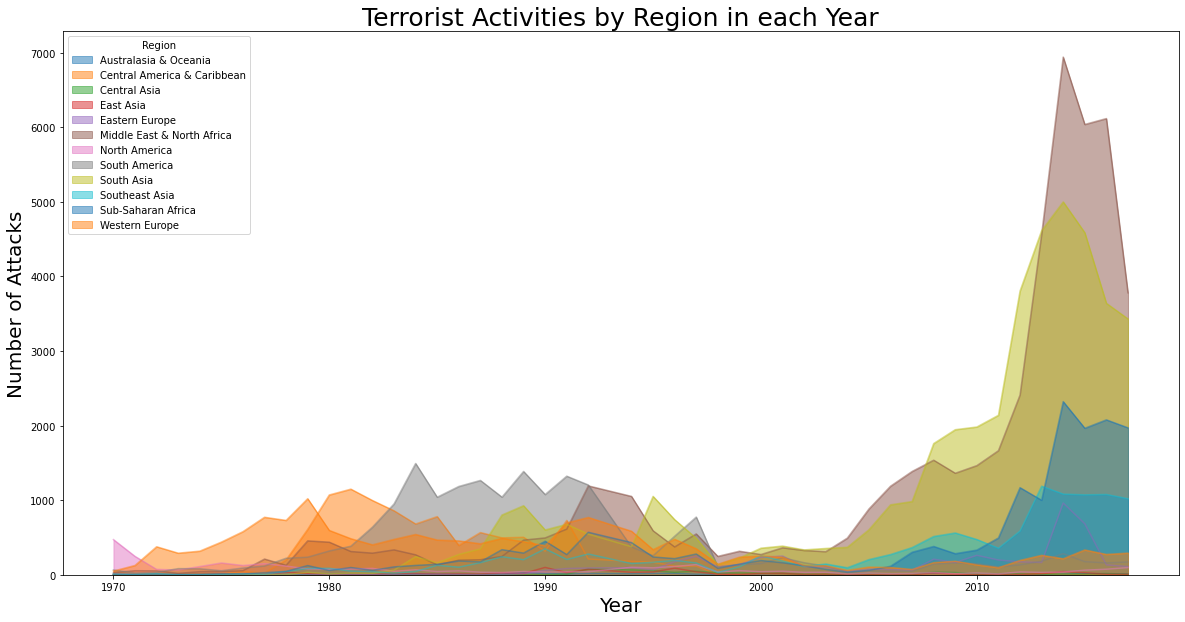

In [85]:
#Plotting region wise attack
pd.crosstab(df.Year,df.Region).plot(kind='area',stacked=False,figsize=(20,10))
plt.title('Terrorist Activities by Region in each Year',fontsize=25)
plt.ylabel('Number of Attacks',fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.show()

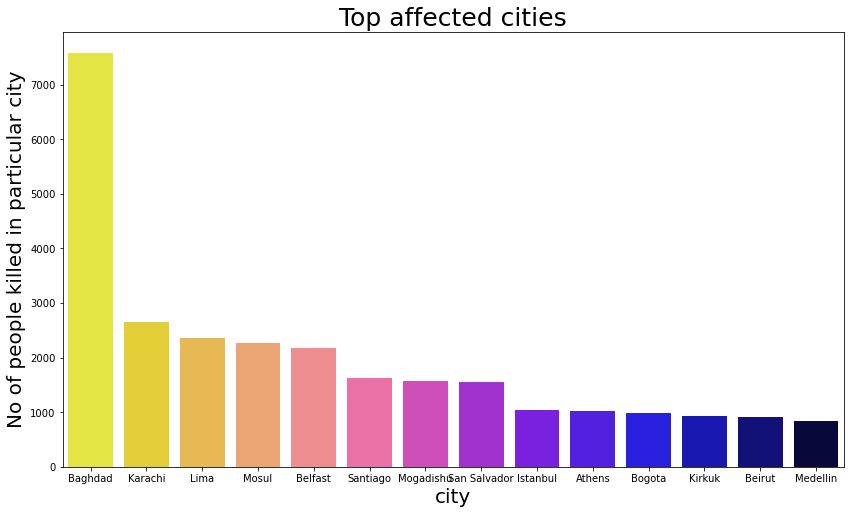

In [86]:
#Hotzone of terrorism
plt.subplots(figsize=(14,8))
sns.barplot(df['city'].value_counts()[1:15].index,df['city'].value_counts()[1:15].values,palette='gnuplot2_r')
plt.title('Top affected cities',fontsize=25)
plt.xlabel('city',fontsize=20)
plt.ylabel('No of people killed in particular city',fontsize=20)
plt.show()

Text(0, 0.5, 'No of people killed')

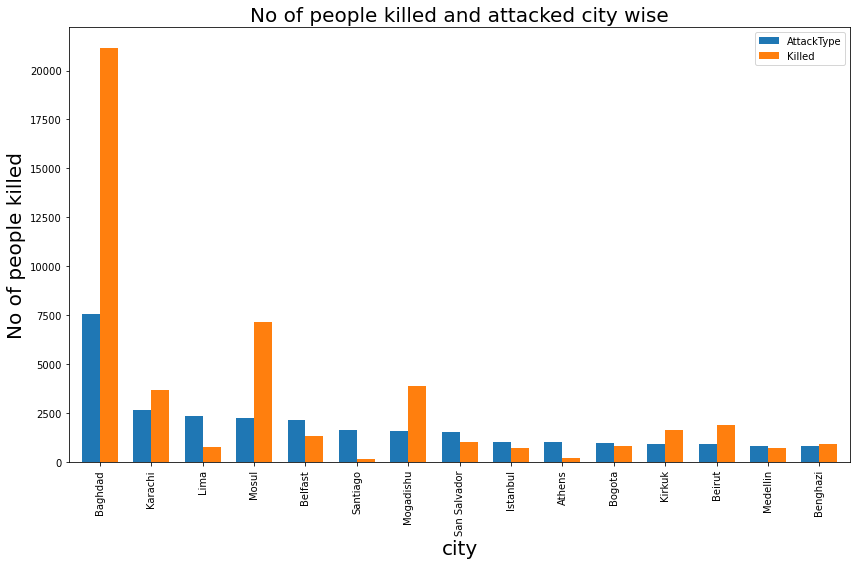

In [87]:
# Plotting  city wise number of people killed and attacked
count_df=df['city'].value_counts().drop('Unknown').head(15).to_frame()
count_df.columns = ['AttackType']
count_killed=df.groupby('city')['Killed'].sum().to_frame()
count_df.merge(count_killed,left_index=True,right_index=True,how='left').plot.bar(width=0.7)
fig=plt.gcf()
fig.set_size_inches(14,8)
plt.title('No of people killed and attacked city wise',fontsize=20)
plt.xlabel('city',fontsize=20)
plt.ylabel('No of people killed',fontsize=20)


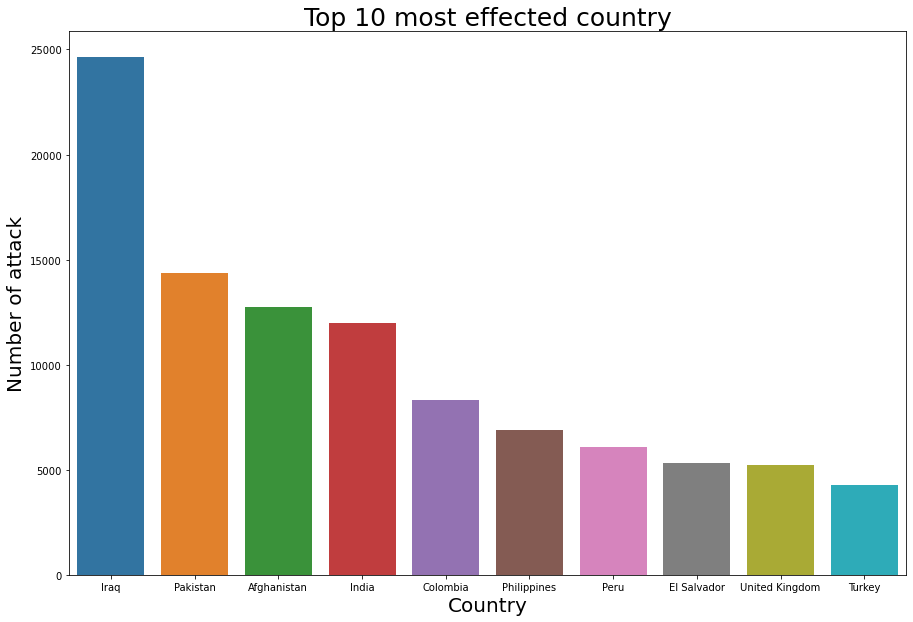

In [88]:
# Top effected countries
plt.figure(figsize=(15,10))
sns.barplot(df['Country'].value_counts()[:10].index,df['Country'].value_counts()[:10].values,palette='tab10')
plt.xlabel("Country",fontsize=20)
plt.ylabel("Number of attack",fontsize=20)
plt.title("Top 10 most effected country",fontsize=25)
plt.show()

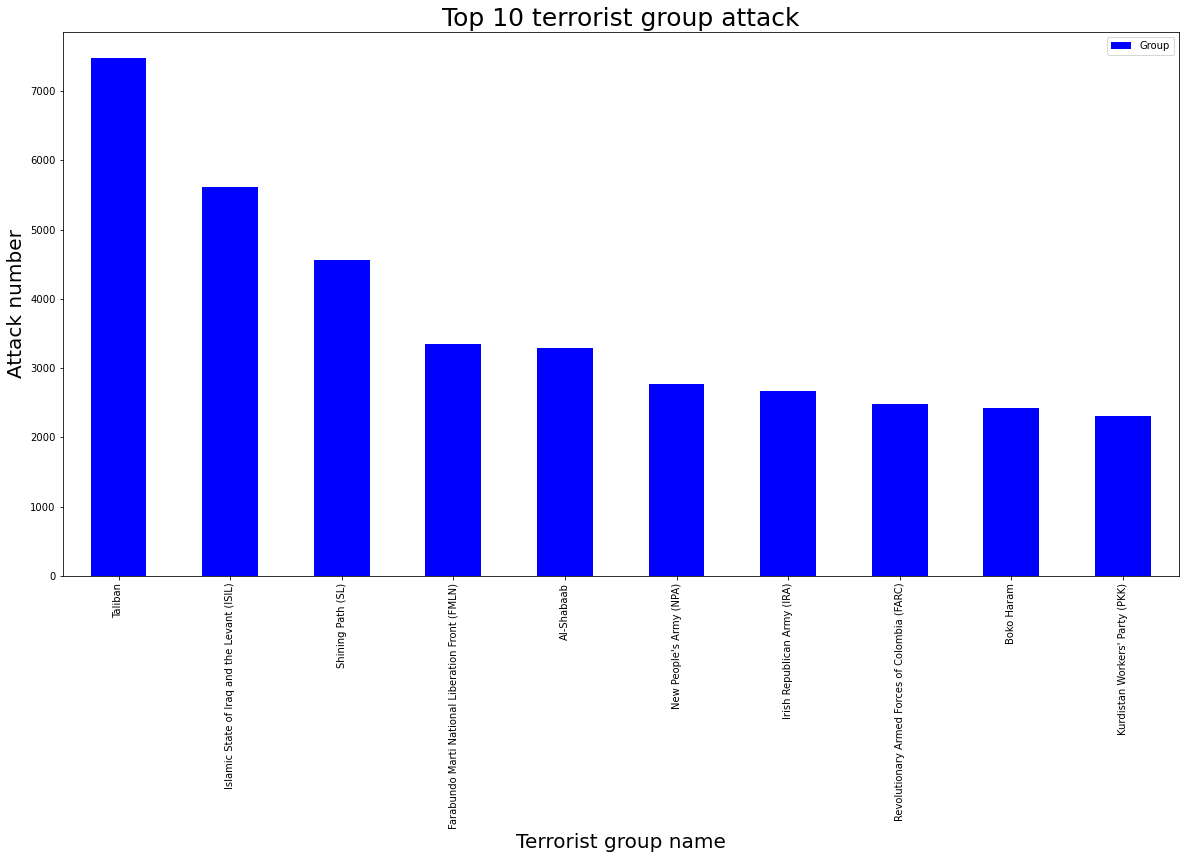

In [89]:
#top 10 Terrorist group attack
df['Group'].value_counts().to_frame().drop('Unknown').head(10).plot(kind='bar',color='Blue',figsize=(20,10))
plt.title("Top 10 terrorist group attack",fontsize=25)
plt.xlabel("Terrorist group name",fontsize=20)
plt.ylabel("Attack number",fontsize=20)
plt.show()

In [90]:
df["AttackType"].unique()


array(['Assassination', 'Hostage Taking (Kidnapping)',
       'Bombing/Explosion', 'Facility/Infrastructure Attack',
       'Armed Assault', 'Hijacking', 'Unknown', 'Unarmed Assault',
       'Hostage Taking (Barricade Incident)'], dtype=object)

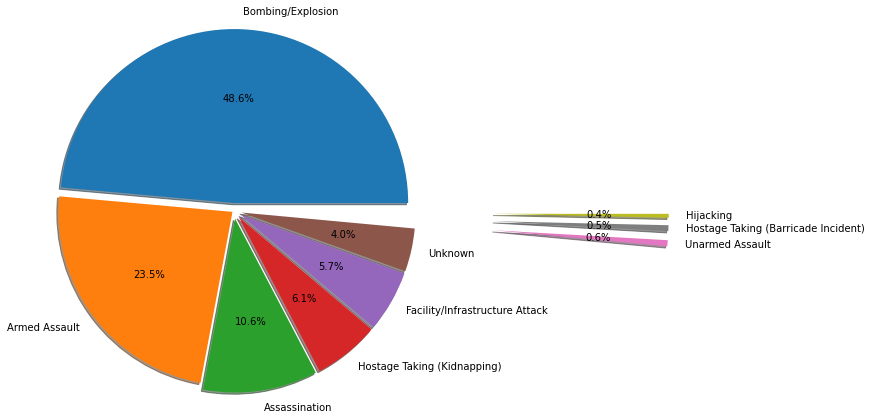

In [91]:
#plotting attacktype using pie chart
plt.pie(df.AttackType.value_counts(),labels=('Bombing/Explosion','Armed Assault','Assassination','Hostage Taking (Kidnapping)',
                                             'Facility/Infrastructure Attack','Unknown', 'Unarmed Assault','Hostage Taking (Barricade Incident)'
                                             ,'Hijacking'),
                                             autopct="%1.1f%%",radius=2,shadow=True,
        explode=[.09,.02,.09,.09,.09,.09,3,3,3])
plt.show()

Text(0, 0.5, 'Count')

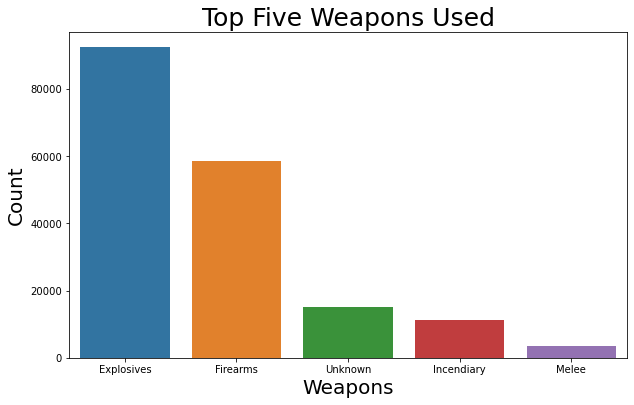

In [92]:
#Top 5 Weapons used by terrorist
plt.figure(figsize=(10,6))
sns.barplot(df['Weapon_type'].value_counts()[:5].index,df['Weapon_type'].value_counts()[:5].values,palette='tab10')
plt.title("Top Five Weapons Used",fontsize=25)
plt.xlabel('Weapons',fontsize=20)
plt.ylabel('Count',fontsize=20)

## CONCLUSION

- Number of attacks increased after the year 2012 and 2014 has the largest number of attacks.
- Middle East and North Africa region has more number of attacks.
- Baghdad has the most number of attacks and deaths happened city.
- Iraq is the most terrorism affected country.
- Taliban is the largest terrorist group attack.
- Bombing/Explosion is the major attacktype.
- Among weapons,Explosives is the major weapons used by terrorist.